## 딥러닝 한번에 끝내기
### 10. 딥러닝 프로젝트

![](./img10/01.png)

![](./img10/02.png)

### 과정 개요

Boston 주택 가격 예측 모델
여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행해봅니다.

Reuters 딥러닝 모델
시퀀스 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

CIFAR10 딥러닝 모델
이미지 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

### 학습 목표

Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다.

Reuters 데이터넷을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습합니다.

CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습합니다.

### 10-2. Boston 주택 가격 예측 모델


![](./img10/03.png)

![](./img10/04.png)

![](./img10/05.png)

실제값에서 평균을 빼서 표준편차로 나누어 표준화 실행

![](./img10/06.png)

회귀모델이기 때문에 출력값은 1개

![](./img10/07.png)

Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있습니다.

데이터셋의 feature에 대한 설명

|feature| 설명                                         |
|-------|--------------------------------------------|
|CRIM| 자치시별 1인당 범죄율                               |
|ZN| 25,000 평방피트를 초과하는 거주지역의 비율                 |
|INDUS| 비소매상업지역이 점유하고 있는 토지의 비율                    |
|CHAS| 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)      |
|NOX| 10ppm 당 농축 일산화질소                           |
|RM| 주택 1 가구당 평균 방의 개수                          |
|AGE| 1940년 이전에 건축된 소유주택의 비율                     |
|DIS| 5개의 보스턴 직업센터까지의 접근성 지수                     |
|RAD| 방사형 도로까지의 접근성 지수                           |
|TAX| 10,000 달러당 재산세율                            |
|PTRATIO| 자치시(town)별 학생/교사 비율                        |
|B| $1000(B_k−0.63)^2$, 여기서Bk는 자치시별 흑인의 비율을 말함 |
|LSTAT| 모집단의 하위계층의 비율(%)                             |
|MEDV| 본인 소유의 주택가격(중앙값)(단위: $1,000)                           |


#### 데이터 로드 및 전처리

먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.

데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [3]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2023-08-09 16:12:52.437434: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [5]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std


#### 모델 구성 및 컴파일

주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [6]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#### 모델 학습

epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [7]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 7ms/step - loss: 503.2031 - mae: 20.4394 - val_loss: 500.1317 - val_mae: 20.3745
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 367.4445 - mae: 16.8114 - val_loss: 342.1182 - val_mae: 16.1936
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 216.1292 - mae: 12.2582 - val_loss: 179.5292 - val_mae: 10.7317
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 103.5633 - mae: 7.7097 - val_loss: 93.5158 - val_mae: 6.9795
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 57.5472 - mae: 5.5782 - val_loss: 56.2182 - val_mae: 5.3279
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 39.4469 - mae: 4.5320 - val_loss: 42.3490 - val_mae: 4.6433
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 30.7778 - mae: 3.8997 - val_loss: 30.1976 - val_mae: 4.1045
Epoch 8/100
21/21 [==============================] - 0s 

/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_39372/2897382491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


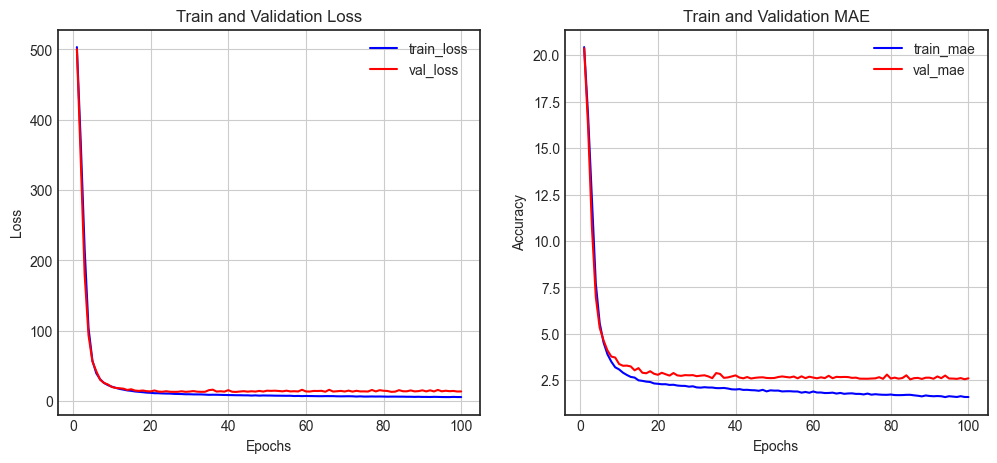

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### 모델 평가 및 예측

테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 20.5494 - mae: 2.9576


### 10-3. Reuters 딥러닝 모델


![](./img10/08.png)

![](./img10/09.png)

![](./img10/10.png)

이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.

#### 데이터 로드 및 전처리

reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [12]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, stratify=train_labels, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [13]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)


#### 모델 구성 및 컴파일

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [14]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)               

#### 모델 학습

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [16]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from keras import models, layers, callbacks

# 이전 코드 (모델 컴파일)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping 추가
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', # 검증 손실 기준 선택
    patience=10, # 중지까지 기다리는 에포크 매개변수
    restore_best_weights=True, # 가장 좋은 가중치 복원 여부 설정
    verbose=1 # 진행 사항 표시
)

# 모델 학습시 콜백 추가
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping]) # 콜백 추가


Epoch 1/40
14/14 [==============================] - 1s 45ms/step - loss: 3.6999 - accuracy: 0.2055 - val_loss: 3.5776 - val_accuracy: 0.5098
Epoch 2/40
14/14 [==============================] - 0s 23ms/step - loss: 2.3963 - accuracy: 0.5030 - val_loss: 3.1921 - val_accuracy: 0.6100
Epoch 3/40
14/14 [==============================] - 0s 27ms/step - loss: 1.7807 - accuracy: 0.6363 - val_loss: 2.8361 - val_accuracy: 0.6870
Epoch 4/40
14/14 [==============================] - 0s 25ms/step - loss: 1.4363 - accuracy: 0.7053 - val_loss: 2.5519 - val_accuracy: 0.6999
Epoch 5/40
14/14 [==============================] - 0s 25ms/step - loss: 1.2163 - accuracy: 0.7503 - val_loss: 2.3355 - val_accuracy: 0.7057
Epoch 6/40
14/14 [==============================] - 0s 25ms/step - loss: 1.0645 - accuracy: 0.7743 - val_loss: 2.1786 - val_accuracy: 0.7079
Epoch 7/40
14/14 [==============================] - 0s 25ms/step - loss: 0.9220 - accuracy: 0.8021 - val_loss: 2.0338 - val_accuracy: 0.7119
Epoch 8/40
14

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_39372/98960745.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


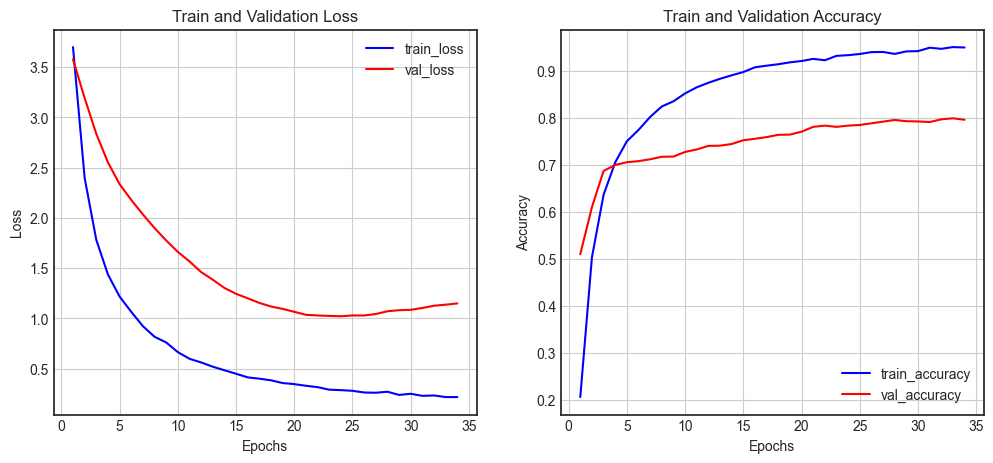

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### 모델 평가 및 예측

테스트 데이터셋을 이용해 모델을 평가합니다.

In [18]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0198 - accuracy: 0.7836


### 10-4. CIFAR10 딥러닝 모델

![](./img10/12.png)

![](./img10/13.png)

![](./img10/14.png)

![](./img10/15.png)

성능이 60% 언더로 나오기 때문에 실제로는 사용이 이려움

이미지를 다룰때는 CNN과 같은 성능이 좋은 아키텍쳐를 사용

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링 되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

#### 데이터 로드 및 전처리

CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [20]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
#20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 33s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [21]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_39372/1276624654.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


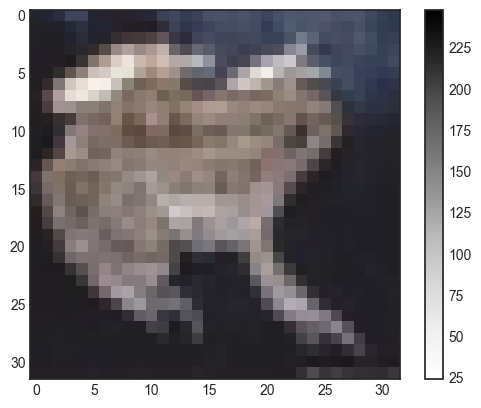

In [22]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [23]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [24]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((40000, 32 * 32 * 3))
x_val = x_val.reshape((10000, 32 * 32 * 3))
x_test = x_test.reshape((10000, 32 * 32 * 3))


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [25]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

#### 모델 구성 및 컴파일

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [26]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               1573376   
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)              

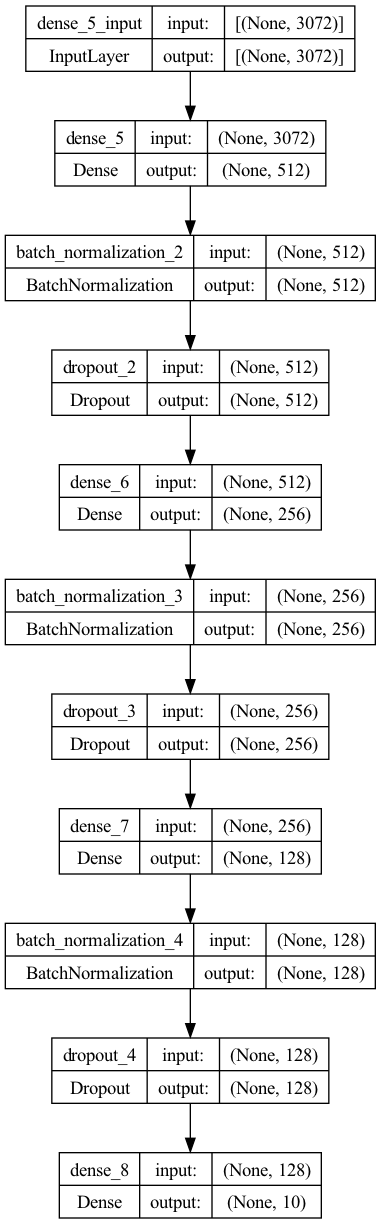

In [28]:
utils.plot_model(model, show_shapes=True)

#### 모델 학습

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [30]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
import tensorflow as tf
from tensorflow import keras

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#ModelCheckpoint 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [34]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping])

Epoch 1/100
625/625 [==============================] - 12s 19ms/step - loss: 1.7213 - accuracy: 0.3840 - val_loss: 1.6110 - val_accuracy: 0.4222
Epoch 2/100
625/625 [==============================] - 12s 20ms/step - loss: 1.7192 - accuracy: 0.3846 - val_loss: 1.6287 - val_accuracy: 0.4296
Epoch 3/100
625/625 [==============================] - 12s 19ms/step - loss: 1.7194 - accuracy: 0.3868 - val_loss: 1.6232 - val_accuracy: 0.4116
Epoch 4/100
625/625 [==============================] - 12s 18ms/step - loss: 1.7152 - accuracy: 0.3868 - val_loss: 1.5952 - val_accuracy: 0.4341
Epoch 5/100
625/625 [==============================] - 12s 19ms/step - loss: 1.7115 - accuracy: 0.3876 - val_loss: 1.5785 - val_accuracy: 0.4415
Epoch 6/100
  7/625 [..............................] - ETA: 10s - loss: 1.6818 - accuracy: 0.4018

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 13s 20ms/step - loss: 1.7078 - accuracy: 0.3889 - val_loss: 1.6111 - val_accuracy: 0.4146
Epoch 7/100
625/625 [==============================] - 13s 20ms/step - loss: 1.7158 - accuracy: 0.3810 - val_loss: 1.5734 - val_accuracy: 0.4362
Epoch 8/100
625/625 [==============================] - 13s 20ms/step - loss: 1.7248 - accuracy: 0.3824 - val_loss: 1.5822 - val_accuracy: 0.4414
Epoch 9/100
625/625 [==============================] - 13s 20ms/step - loss: 1.7259 - accuracy: 0.3816 - val_loss: 1.5896 - val_accuracy: 0.4296
Epoch 10/100
625/625 [==============================] - 13s 20ms/step - loss: 1.7156 - accuracy: 0.3864 - val_loss: 1.5820 - val_accuracy: 0.4293
Epoch 11/100
625/625 [==============================] - 12s 20ms/step - loss: 1.7152 - accuracy: 0.3871 - val_loss: 1.5858 - val_accuracy: 0.4371
Epoch 12/100
625/625 [==============================] - 13s 21ms/step - loss: 1.7116 - accuracy: 0.3877 - val_loss: 1.5803 - val_accuracy: 0

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.


/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_39372/193175115.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


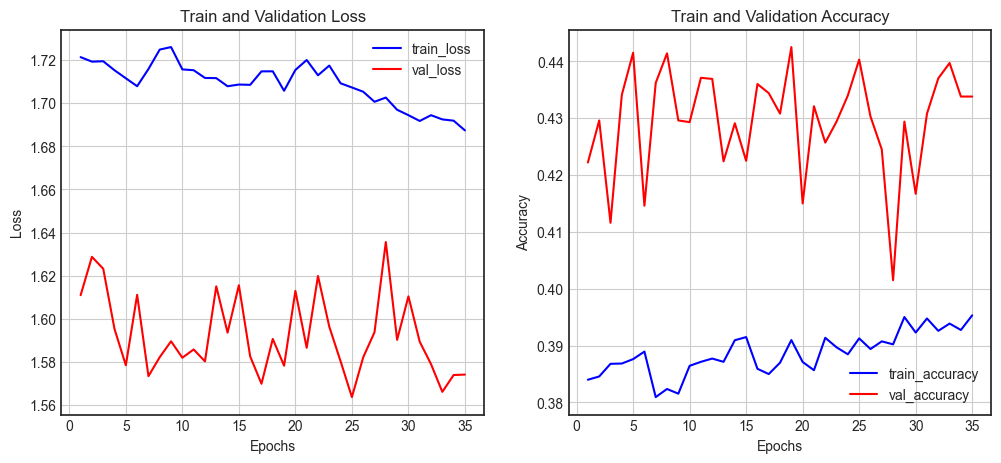

In [36]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()


모델 평가 및 예측
테스트 데이터셋을 이용해 모델을 평가합니다.

In [37]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5628 - accuracy: 0.4356


[1.5627609491348267, 0.43560001254081726]

사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘듭니다. 이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다. CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있습니다.

![](./img10/16.png)

### 이번 시간 정리

이번 시간에는 딥러닝을 이용해 주택 가격 예측, 뉴스 주제 분류, 이미지 분류 등 다양한 응용에 활용하는 방법을 익혔습니다.

어떤 데이터를 다루느냐에 따라 다양한 아키텍처를 사용해야 한다는 사실도 배웠습니다.

따라서 이 과정 이후에 컴퓨터 비전, 자연어 처리 등과 같이 세분화된 딥러닝 모델을 익혀야 합니다.

앞으로 다양한 딥러닝 모델을 학습하여 훌륭한 인공지능/딥러닝 개발자가 되시길 바라겠습니다.

수고 많으셨습니다.

